<a href="https://colab.research.google.com/github/kesavasivaNagaraju/FML-lab/blob/main/lr_with_lasso_and_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("linear regression")

linear regression


In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
url = '/content/data1.csv'

In [ ]:
data = pd.read_csv(url)

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


In [ ]:
print(data['TV'].corr(data['Sales']))
print(data['Radio'].corr(data['Sales']))
print(data['Newspaper'].corr(data['Sales']))

0.9012079133023306
0.3496310970076693
0.15796002615492621


In [ ]:
newdata = data[['TV','Sales']]

In [ ]:
train.head(10)

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
5,8.7
6,57.5
7,120.2
8,8.6
9,199.8


In [ ]:
newdata.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [ ]:
msk = np.random.rand(len(newdata)) <= 0.8

In [ ]:
traindata = newdata[msk]
testdata = newdata[~msk]

In [ ]:
traindata.describe()
#testdata.describe()`

,TV,Sales
count,163.000000,163.000000
mean,144.356442,15.077301
std,87.104234,5.407760
min,0.700000,1.600000
25%,69.100000,10.850000
50%,149.700000,16.000000
75%,217.600000,19.100000
max,296.400000,27.000000


ValueError: ignored

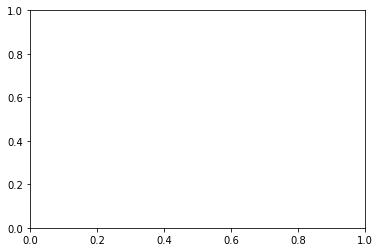

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(traindata,testdata)
plt.show()

In [ ]:
trainx = traindata[['TV']]
trainy = traindata[['Sales']]

In [ ]:
testx = testdata[['TV']]
testy = testdata[['Sales']]

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()


In [ ]:
model.fit(trainx,trainy)

LinearRegression()

In [ ]:
yhat = model.predict(testx)

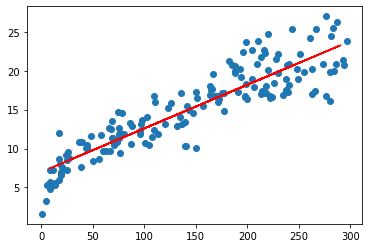

In [ ]:
#plt.scatter()
plt.scatter(trainx,trainy)
plt.plot(testx,yhat,c='r')
plt.show()

In [ ]:
print("mean absoulete error",np.mean(np.absolute(testx-yhat)))
print("mean square error",np.mean(testx-yhat)**2)
from sklearn.metrics import r2_score
print("r_2 score",r2_score(yhat,testx))

mean absoulete error TV    142.985377
dtype: float64
mean square error TV    20444.818048
dtype: float64
r_2 score -1326.102968987574


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
from sklearn.metrics import median_absolute_error,mean_squared_error,r2_score

In [ ]:
b = mean_squared_error(testy,yhat)

In [ ]:
a = mean_absolute_error(testy,yhat)
import math
d = math.sqrt(b)
c = r2_score(testy,yhat)
print(a)
print(b)
print(c)
print(d)

1.683129312358747
4.38130425780085
0.8013341032343174
2.0931565296940526


In [ ]:
r = np.random.randint(1,50)
modellasso = linear_model.Lasso(alpha=r)
a = np.random.randint(1,100)
modelridge = linear_model.Ridge(alpha=a)
modellasso.fit(trainx,trainy)
modelridge.fit(trainx,trainy)

Ridge(alpha=76)

In [ ]:
lr = modelridge.predict(testx)
lp = modellasso.predict(testx)

In [ ]:
#mean_absolute_error,
print("Lasso")
print("mse",mean_squared_error(testy,lp))
print("mae",mean_absolute_error(testy,lp))
print("r2_score",r2_score(testy,lp))

Lasso
mse 4.304101455864694
mae 1.7240489336381406
r2_score 0.8048347877284749


In [ ]:
#mean_absolute_error,
print("Ridge")
print("mse",mean_squared_error(testy,lr))
print("mae",mean_absolute_error(testy,lr))
print("r2_score",r2_score(testy,lr))

Ridge
mse 4.381149136999696
mae 1.6831665036164984
r2_score 0.8013411370332173
